In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import median_abs_deviation
from scipy.optimize import curve_fit

import astropy.units as u

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "14",
      "figure.figsize" : [10,5]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [20]:
simulation_1 = 'out1.txt'
simulation_2 = 'out2.txt'
simulation_3 = 'out3.txt'
simulation_4 = 'out4.txt'
simulation_5 = 'out5.txt'

file_name = simulation_4

file = open(file_name, 'r')

dim = 3
N_part = int(file.readline()) # read the first line where is written the number of particles
t_0 = file.readline() # read the second line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

print('N_part : ', N_part)
print('initial time : ', t_0)
print('N_lines: ', N_lines)

N_part :  2
initial time :  0.01674979270186815

N_lines:  1992


In [21]:
N_lines_snap = 2+N_part
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  498.0


In [22]:
N_cols = 7
data = np.empty([int(N_snap), int(N_part), int(N_cols)])
times = np.zeros(int(N_snap))
#masses = np.empty([N_snap, N_part])

for i_snap in range(int(N_snap)):
    initial_line = i_snap * N_lines_snap
    data_init_line = initial_line + 2
    
    times[i_snap] = np.genfromtxt(file_name, skip_header=initial_line+1, max_rows=1)
    #masses[i_snap] = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part, usecols=0)
    values = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part)
    data[i_snap] = values

print(data[0][0])

[ 5.00000000e+01 -2.22589741e-07  2.23341648e-08  0.00000000e+00
 -2.66666513e-05  2.68020030e-06  0.00000000e+00]


In [23]:
masses = np.empty([int(N_snap), int(N_part)])
positions = np.empty([int(N_snap), int(N_part), dim])
velocities = np.empty([int(N_snap), int(N_part), dim])

for i in range(int(N_snap)):
    for j in range(int(N_part)):
        masses[i][j] = data[i][j][0]
        positions[i][j] = data[i][j][1:4]
        velocities[i][j] = data[i][j][4:]


In [24]:
positions[:,0,0:2] # takes the position x and y for the first particle for each snapshot

array([[-2.22589741e-07,  2.23341648e-08],
       [-8.87292723e-07,  8.93307382e-08],
       [-8.87292723e-07,  8.93307382e-08],
       [-1.98954301e-06,  2.00984028e-07],
       [-3.52481895e-06,  3.57292608e-07],
       [-3.52481895e-06,  3.57292608e-07],
       [-5.48864270e-06,  5.58259311e-07],
       [-5.48864270e-06,  5.58259311e-07],
       [-7.87657982e-06,  8.03891226e-07],
       [-1.06842388e-05,  1.09419969e-06],
       [-1.06842388e-05,  1.09419969e-06],
       [-1.39072706e-05,  1.42920030e-06],
       [-1.75413681e-05,  1.80891288e-06],
       [-1.75413681e-05,  1.80891288e-06],
       [-2.15822662e-05,  2.23336151e-06],
       [-2.15822662e-05,  2.23336151e-06],
       [-2.60257404e-05,  2.70257449e-06],
       [-3.08676076e-05,  3.21658437e-06],
       [-3.08676076e-05,  3.21658437e-06],
       [-3.61037245e-05,  3.77542794e-06],
       [-4.17299880e-05,  4.37914619e-06],
       [-4.77423345e-05,  5.02778438e-06],
       [-4.77423345e-05,  5.02778438e-06],
       [-5.

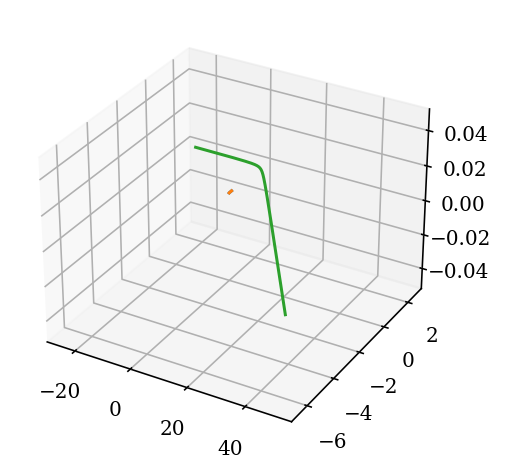

In [25]:
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection = '3d')
plt.plot(positions[:,0,0], positions[:,0,1], positions[:,0,2])

ax.plot3D(positions[:,0,0], positions[:,0,1], positions[:,0,2])
ax.plot3D(positions[:,1,0], positions[:,1,1], positions[:,1,2])

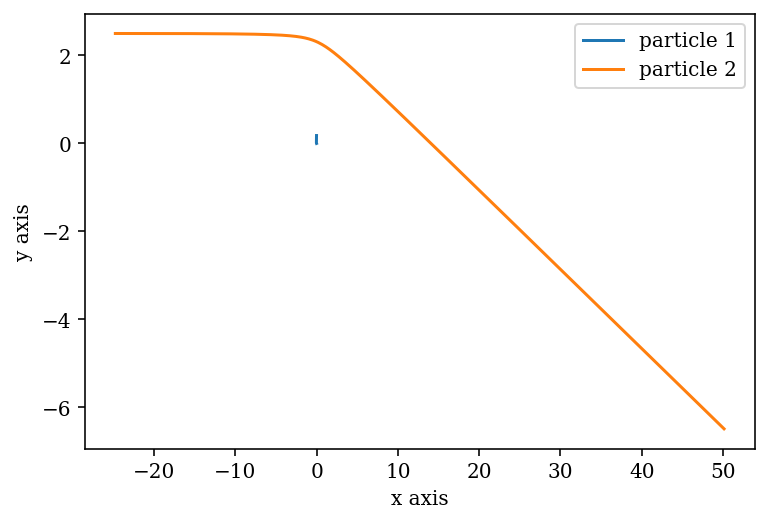

In [26]:
plt.plot(positions[:,0,0], positions[:,0,1], label='particle 1')
plt.plot(positions[:,1,0], positions[:,1,1], label='particle 2')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()

find the angle between the initial and the final trajectory

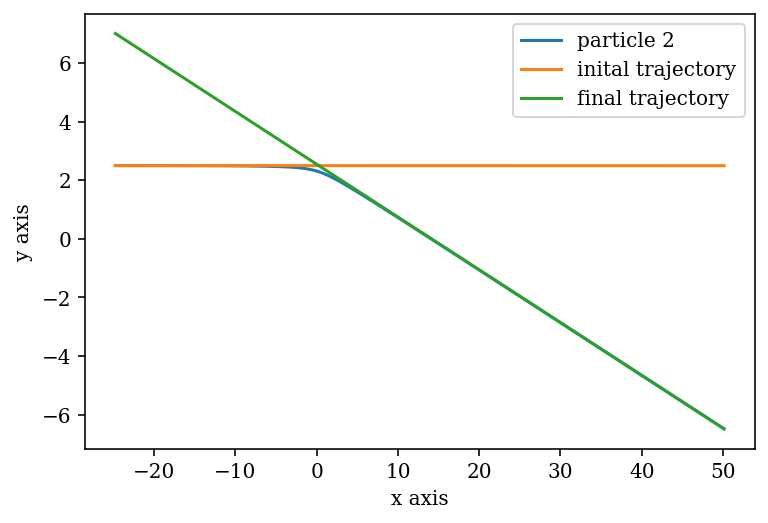

In [41]:
init_line_fit = np.polyfit(positions[:,1,0][:10], positions[:,1,1][:10], 1)
init_line = np.poly1d(init_line_fit)

final_line_fit = np.polyfit(positions[:,1,0][-10:], positions[:,1,1][-10:], 1)
final_line = np.poly1d(final_line_fit)

init_traj = init_line(positions[:,1,0])
final_traj = final_line(positions[:,1,0])

#plt.plot(positions[:,0,0], positions[:,0,1], label='particle 1')
plt.plot(positions[:,1,0], positions[:,1,1], label='particle 2')
plt.plot(positions[:,1,0], init_traj, label='inital trajectory')
plt.plot(positions[:,1,0], final_traj, label='final trajectory')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()

The tangent of the deflection angle can be computed from the angular coeefficients of the lines:

$\tan{\theta} = \frac{m_f-m_i}{1 + m_fm_i}$

In [78]:
tg_theta = (final_line[1] - init_line[1]) / (1 + init_line[1]*final_line[1])
theta_rad = np.arctan(tg_theta) # to pick the right angle
theta_deg = 360*theta_rad/(2*np.pi) # conversion in degrees
print('theta = ', theta_deg)

theta =  -10.216570198812471


This is the numerical result.

Now we can compute the theoretical expectation:

$\theta = 2\phi_0 - \pi$

where: 

$\tan{\phi_0} = - \frac{b\,v_0^2}{GM}$

In [77]:
b = positions[0,1,1] - positions[0,0,1]
M = masses[0,0]
v_0 = velocities[0,1,0] 
G = 1

tan_phi0 = - (b*v_0**2)/(G*M)
phi0 = np.arctan(tan_phi0)

theta_th = (2*phi0 - np.pi)*360/(2*np.pi)
print(tan_phi0)

-11.251994961132837


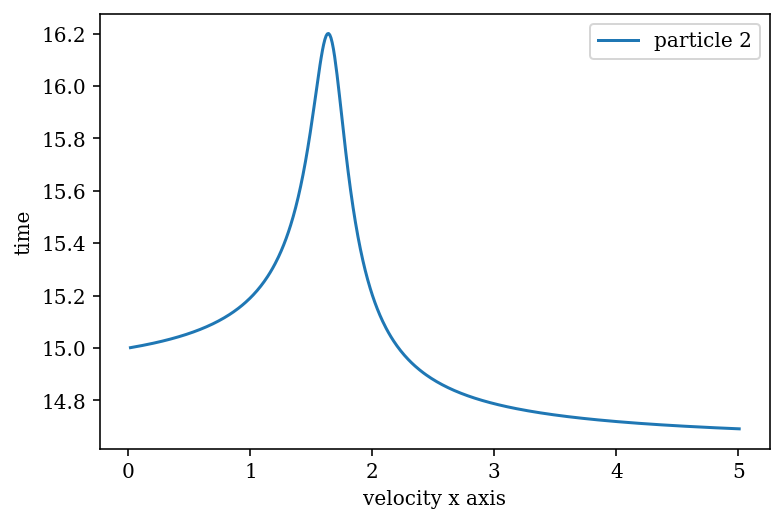

In [31]:
#plt.plot(positions[:,0,0], velocities[:,0,1], label='particle 1')
plt.plot(times, velocities[:,1,0], label='particle 2')
plt.xlabel('velocity x axis')
plt.ylabel('time')
plt.legend()